In [1]:
import numpy as np

In [28]:
def N(m):
    """
    Compute N(m) =  ((1 - s1^2) * (1 - s2^2)),
    where s1 and s2 are the singular values of the matrix m.
    """
    # Ensure the input is a 2x2 matrix
    #if m.shape != (2, 2):
    #    raise ValueError("Input matrix m must be 2x2.")
    
    # Compute the singular values of the matrix m
    singular_values = np.linalg.svd(m, compute_uv=False)
    s1, s2 = singular_values[:2]  # Get the first two singular values (for 2x2)
    
    # Compute N(m)
    n = (1 - s1**2) * (1 - s2**2)
    
    return n

In [29]:
def g(i1, i2, j1, j2, m):
    """
    Compute g(i1, i2, j1, j2) = N(m) / N(m'),
    where m' = D_a * m * D_b, and D_a and D_b are diagonal matrices
    defined based on i1, i2, j1, j2.
    
    Parameters:
        i1, i2, j1, j2: int
            Binary inputs (0 or 1) to define diagonal matrices D_a and D_b.
        m: numpy.ndarray
            A 2x2 matrix.
    
    Returns:
        float
            The computed value of g(i1, i2, j1, j2).
    """
    # Ensure inputs are binary
    if any(x not in {0, 1} for x in [i1, i2, j1, j2]):
        raise ValueError("Inputs i1, i2, j1, and j2 must be binary (0 or 1).")
    
    # Ensure the matrix is 2x2
    #if m.shape != (2, 2):
    #    raise ValueError("Matrix m must be 2x2.")
    
    # Define the diagonal matrices D_a and D_b
    D_a = np.diag([i1, i2])
    D_b = np.diag([j1, j2])
    
    # Compute m' = D_a * m * D_b
    m_prime = D_a @ m @ D_b
    
    # Compute N(m) and N(m')
    Nm = N(m)
    Nm_prime = N(m_prime)
    
    # Check for division by zero
    #if Nm_prime == 0:
    #    raise ValueError("N(m') is zero, the computation is undefined.")
    
    return Nm / (Nm_prime +0.000000001)


### Let $g(a_1, a_2, b_1, b_2)$ be a function with binary inputs \( 0 \) or \( 1 \). The function  $p(a_1, a_2, b_1, b_2)$ is defined as:

$$ p(a_1, a_2, b_1, b_2) = \sum_{i_1 \in [0, a_1]} \sum_{i_2 \in [0, a_2]} \sum_{j_1 \in [0, b_1]} \sum_{j_2 \in [0, b_2]} g(i_1, i_2, j_1, j_2) \cdot (-1)^{(a_1 + a_2 + b_1 + b_2) - (i_1 + i_2 + j_1 + j_2)}$$

In [30]:
def p(a1, a2, b1, b2, m):
    
    # Ensure inputs are binary
    if any(x not in {0, 1} for x in [a1, a2, b1, b2]):
        raise ValueError("Inputs a1, a2, b1, and b2 must be binary (0 or 1).")
    
    result = 0
    total_sum = a1 + a2 + b1 + b2

    # Iterate over all combinations of i1, i2, j1, j2
    for i1 in range(a1 + 1):
        for i2 in range(a2 + 1):
            for j1 in range(b1 + 1):
                for j2 in range(b2 + 1):
                    # Compute the power of -1
                    sign = (-1) ** (total_sum - (i1 + i2 + j1 + j2))
                    # Add to the result
                    result += g(i1, i2, j1, j2, m) * sign
    
    return np.round(result,8)


##  parametrized M  for T1 = T2 =T

$$ M = T* R_{\alpha - \beta}$$

In [31]:
def M_2x2_parametrized(params):
    
    
    [alpha, beta, T ] = params
    
    gamma = alpha - beta
    
    R = np.array([
        [np.cos(gamma), -np.sin(gamma)],
        [np.sin(gamma),  np.cos(gamma)]])
    
    
    #D = np.diag([l0, l1])
    
    # Compute m' = D_a * m * D_b
    #M = R1 @ D @ R2.T
    M = T * R
    
    return M
    


In [32]:
m=M_2x2_parametrized([0.5,0.5,0.999])

## local mapping

In [541]:
# Local mappings for Alice and Bob
def alice_mapping(a1, a2):
    # valid terms
    if (a1, a2) == (0, 1):
        return 0
    elif (a1, a2) == (1, 0):
        return 1
    
    # not valid terms
    elif (a1, a2) == (0, 0):
        return 0
    elif (a1, a2) == (1, 1):
        return 0

def bob_mapping(b1, b2):
    # valid terms
    if (b1, b2) == (0, 1):
        return 0
    elif (b1, b2) == (1, 0):
        return 1
    
    # not valid terms
    elif (b1, b2) == (0, 0):
        return 0
    elif (b1, b2) == (1, 1):
        return 0

# Initialize q(a, b)
q = {
    (0, 0): 0.0,
    (0, 1): 0.0,
    (1, 0): 0.0,
    (1, 1): 0.0
}

# Collect all possible combinations
all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                     for b1 in [0, 1] for b2 in [0, 1]]

# Compute q(a, b)
for a1, a2, b1, b2 in all_combinations:
    prob = p(a1, a2, b1, b2, m)
    
    # Get local mappings for Alice and Bob
    a = alice_mapping(a1, a2)
    b = bob_mapping(b1, b2)
    
    q[(a, b)] += prob

# Output the resulting q distribution
print("Mapped q Distribution:")
for key, value in q.items():
    print(f"q{key} = {value:.5f}")


Mapped q Distribution:
q(0, 0) = 0.99775
q(0, 1) = 0.00000
q(1, 0) = 0.00000
q(1, 1) = 0.00199


In [542]:
q[(0,0)]

0.99775481

In [543]:
for a1, a2, b1, b2 in all_combinations:
    print(p(a1, a2, b1, b2, m))

4e-06
0.0
0.0
0.0
0.0
0.001995
0.0
0.0
0.0
0.0
0.001995
0.0
0.0
0.0
0.0
0.99575581


### CHSH with $T_1 = T_2 =T$

$$ M = T * R_{\alpha-  \beta}$$

Lets consider ${\beta}_0$ = 0

We defnd $M_{xy}$

$M_{00}= T *R(a0)$

$M_{01}= T *R(a0-b1)$

$M_{10}= T *R(a1)$

$M_{11}= T *R(a1-b1)$

In [544]:
# Local mappings for Alice and Bob
def alice_mapping(a1, a2):
    # valid terms
    if (a1, a2) == (0, 1):
        return 0
    elif (a1, a2) == (1, 0):
        return 1
    
    # not valid terms
    elif (a1, a2) == (0, 0):
        return 0
    elif (a1, a2) == (1, 1):
        return 0

def bob_mapping(b1, b2):
    # valid terms
    if (b1, b2) == (0, 1):
        return 0
    elif (b1, b2) == (1, 0):
        return 1
    
    # not valid terms
    elif (b1, b2) == (0, 0):
        return 0
    elif (b1, b2) == (1, 1):
        return 0

In [545]:
def CHSH_Score(params):
    
    [T, alpha0, alpha1, beta1] = params
    #beta0 = 0
    
    # Rxy
    R00 = np.array([
        [np.cos(alpha0), -np.sin(alpha0)],
        [np.sin(alpha0),  np.cos(alpha0)]])
    
    R01 = np.array([
        [np.cos(alpha0-beta1), -np.sin(alpha0-beta1)],
        [np.sin(alpha0-beta1),  np.cos(alpha0-beta1)]])
    
    R10 = np.array([
        [np.cos(alpha1), -np.sin(alpha1)],
        [np.sin(alpha1),  np.cos(alpha1)]])
    
    R11 = np.array([
        [np.cos(alpha1-beta1), -np.sin(alpha1-beta1)],
        [np.sin(alpha1-beta1),  np.cos(alpha1-beta1)]])
    
    M00 = T * R00
    M01 = T * R01
    M10 = T * R10
    M11 = T * R11
    
    
    #....................................................
    
    # Initialize q(a, b)
    q00 = {
        (0, 0): 0.0,
        (0, 1): 0.0,
        (1, 0): 0.0,
        (1, 1): 0.0}
    
    q01 = q00.copy()
    q10 = q00.copy()
    q11 = q00.copy()
    
    
    # Collect all possible combinations
    all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                         for b1 in [0, 1] for b2 in [0, 1]]

    # Compute q(a, b)
    # here we assume the same relabaling for all x,y inputs
    for a1, a2, b1, b2 in all_combinations:
        prob00 = p(a1, a2, b1, b2, M00)
        prob01 = p(a1, a2, b1, b2, M01)
        prob10 = p(a1, a2, b1, b2, M10)
        prob11 = p(a1, a2, b1, b2, M11)

        # Get local mappings for Alice and Bob
        a = alice_mapping(a1, a2)
        b = bob_mapping(b1, b2)

        q00[(a, b)] += prob00
        q01[(a, b)] += prob01
        q10[(a, b)] += prob10
        q11[(a, b)] += prob11
        
    avg_00 = q00[(0, 0)]+q00[(1, 1)]-q00[(0, 1)]-q00[(1, 0)]
    avg_01 = q01[(0, 0)]+q01[(1, 1)]-q01[(0, 1)]-q01[(1, 0)]
    avg_10 = q10[(0, 0)]+q10[(1, 1)]-q10[(0, 1)]-q10[(1, 0)]
    avg_11 = q11[(0, 0)]+q11[(1, 1)]-q11[(0, 1)]-q11[(1, 0)]
    
    CHSH_score = avg_00 + avg_01 + avg_10 - avg_11
    
    return -CHSH_score

In [546]:
T = 0.6

alpha0 = 0.38

alpha1 = 0

beta1 = 0.9

params  = [T, alpha0, alpha1, beta1]

CHSH_Score(params)


-2.1608115000000003

In [547]:
from scipy.optimize import minimize

init_param = np.random.uniform(0, 1, 4)  # Random starting matrix  #########????
bounds = [(0, 1), (0, 2*np.pi),(0, 2*np.pi), (0, 2*np.pi)]  # Element-wise bounds for m



# Optimize
result = minimize(
    CHSH_Score,
    init_param,
    bounds=bounds,
    method='Nelder-Mead',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_m = result.x
print("Optimized matrix m:\n", optimized_m)
print("Objective value:", -result.fun)

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 26
         Function evaluations: 93
Optimized matrix m:
 [0.         0.46591368 0.47644342 0.55802229]
Objective value: 2.0


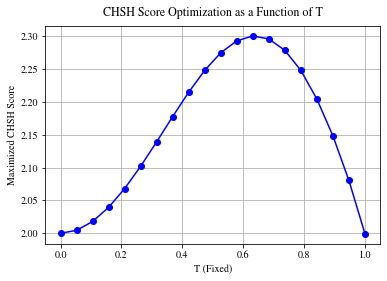

In [551]:
import matplotlib.pyplot as plt

def optimize_for_fixed_T(T_fixed):
    # Objective function with T fixed
    def objective(variables):
        alpha0, alpha1, beta1 = variables
        return CHSH_Score([T_fixed, alpha0, alpha1, beta1])  # Negative for maximization

    # Initial guess for alpha0, alpha1, beta1
    init_param = np.random.uniform(0, 2 * np.pi, 3)

    # Bounds for the other parameters
    bounds = [(0, 2 * np.pi), (0, 2 * np.pi), (0, 2 * np.pi)]

    # Optimization
    result = minimize(
        objective,
        init_param,
        bounds=bounds,
        method='Powell',  # You can experiment with other methods
        options={'disp': False}
    )
    return -result.fun  # Return the maximized score

# Array of 50 fixed T values


grid = 20
T_values = np.linspace(0, 0.999, grid)
optimized_scores = np.zeros(grid)

# Store optimized scores for each T # repeat optimization 3 times ...


for i in range(grid):
    T = T_values[i]
    Best_val = 0
    for _ in range(3):
        new_val = optimize_for_fixed_T(T)
        if new_val > Best_val:
            Best_val = new_val
    optimized_scores[i] = Best_val
#optimized_scores = [optimize_for_fixed_T(T) for T in T_values]

# Plot the result
plt.plot(T_values, optimized_scores, marker='o', linestyle='-', color='b')
plt.xlabel('T (Fixed)')
plt.ylabel('Maximized CHSH Score')
plt.title('CHSH Score Optimization as a Function of T')
plt.grid(True)
plt.show()

In [552]:
optimize_for_fixed_T(T_fixed=0.6)

2.2976752199999995

## With post selection

In [553]:
def p_post_select(a1, a2, b1, b2, m):
    
    if a1==a2==b1==b2== 0:
        return 0
    
    p_fail = p(0, 0, 0, 0, m)
    
    return p(a1, a2, b1, b2, m)/(1-p_fail)

In [554]:
def CHSH_Score_post_select(params):
    
    [T, alpha0, alpha1, beta1] = params
    #beta0 = 0
    
    # Rxy
    R00 = np.array([
        [np.cos(alpha0), -np.sin(alpha0)],
        [np.sin(alpha0),  np.cos(alpha0)]])
    
    R01 = np.array([
        [np.cos(alpha0-beta1), -np.sin(alpha0-beta1)],
        [np.sin(alpha0-beta1),  np.cos(alpha0-beta1)]])
    
    R10 = np.array([
        [np.cos(alpha1), -np.sin(alpha1)],
        [np.sin(alpha1),  np.cos(alpha1)]])
    
    R11 = np.array([
        [np.cos(alpha1-beta1), -np.sin(alpha1-beta1)],
        [np.sin(alpha1-beta1),  np.cos(alpha1-beta1)]])
    
    M00 = T * R00
    M01 = T * R01
    M10 = T * R10
    M11 = T * R11
    
    
    #....................................................
    
    # Initialize q(a, b)
    q00 = {
        (0, 0): 0.0,
        (0, 1): 0.0,
        (1, 0): 0.0,
        (1, 1): 0.0}
    
    q01 = q00.copy()
    q10 = q00.copy()
    q11 = q00.copy()
    
    
    # Collect all possible combinations
    all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                         for b1 in [0, 1] for b2 in [0, 1]]

    # Compute q(a, b)
    # here we assume the same relabaling for all x,y inputs
    for a1, a2, b1, b2 in all_combinations:
        prob00 = p_post_select(a1, a2, b1, b2, M00)
        prob01 = p_post_select(a1, a2, b1, b2, M01)
        prob10 = p_post_select(a1, a2, b1, b2, M10)
        prob11 = p_post_select(a1, a2, b1, b2, M11)

        # Get local mappings for Alice and Bob
        a = alice_mapping(a1, a2)
        b = bob_mapping(b1, b2)

        q00[(a, b)] += prob00
        q01[(a, b)] += prob01
        q10[(a, b)] += prob10
        q11[(a, b)] += prob11
        
    avg_00 = q00[(0, 0)]+q00[(1, 1)]-q00[(0, 1)]-q00[(1, 0)]
    avg_01 = q01[(0, 0)]+q01[(1, 1)]-q01[(0, 1)]-q01[(1, 0)]
    avg_10 = q10[(0, 0)]+q10[(1, 1)]-q10[(0, 1)]-q10[(1, 0)]
    avg_11 = q11[(0, 0)]+q11[(1, 1)]-q11[(0, 1)]-q11[(1, 0)]
    
    CHSH_score = avg_00 + avg_01 + avg_10 - avg_11
    
    return -CHSH_score

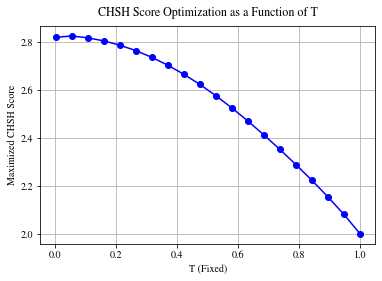

In [556]:
import matplotlib.pyplot as plt

def optimize_for_fixed_T(T_fixed):
    # Objective function with T fixed
    def objective(variables):
        alpha0, alpha1, beta1 = variables
        return CHSH_Score_post_select([T_fixed, alpha0, alpha1, beta1])  # Negative for maximization

    # Initial guess for alpha0, alpha1, beta1
    init_param = np.random.uniform(0, 2 * np.pi, 3)

    # Bounds for the other parameters
    bounds = [(0, 2 * np.pi), (0, 2 * np.pi), (0, 2 * np.pi)]

    # Optimization
    result = minimize(
        objective,
        init_param,
        bounds=bounds,
        method='Powell',  # You can experiment with other methods
        options={'disp': False}
    )
    return -result.fun  # Return the maximized score

# Array of 50 fixed T values


grid = 20
T_values = np.linspace(0.001, 0.999, grid)
optimized_scores_post_select = np.zeros(grid)

# Store optimized scores for each T # repeat optimization 3 times ...


for i in range(grid):
    T = T_values[i]
    Best_val = 0
    for _ in range(3):
        new_val = optimize_for_fixed_T(T)
        if new_val > Best_val:
            Best_val = new_val
    optimized_scores_post_select[i] = Best_val
#optimized_scores = [optimize_for_fixed_T(T) for T in T_values]

# Plot the result
plt.plot(T_values, optimized_scores_post_select, marker='o', linestyle='-', color='b')
plt.xlabel('T (Fixed)')
plt.ylabel('Maximized CHSH Score')
plt.title('CHSH Score Optimization as a Function of T')
plt.grid(True)
plt.show()

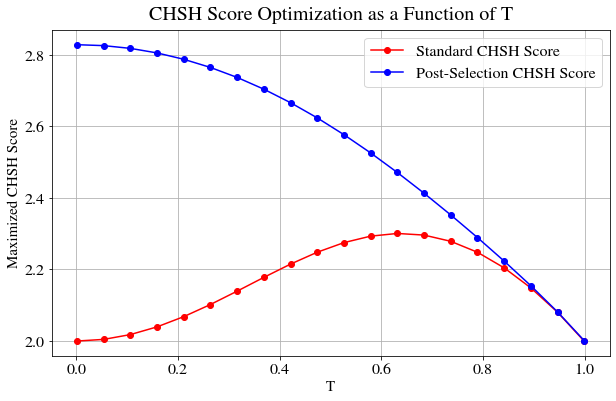

In [558]:
optimized_scores_post_select[0] = 2.8284

# Plot the result
import matplotlib


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

matplotlib.rcParams['axes.titlepad'] = 10  # pad is in points...


fig, ax = plt.subplots(figsize=(10,6))


plt.plot(T_values, optimized_scores, marker='o', linestyle='-', color='r', label='Standard CHSH Score')
plt.plot(T_values, optimized_scores_post_select, marker='o', linestyle='-', color='b', label='Post-Selection CHSH Score')
plt.xlabel('T', size = 15)
plt.ylabel('Maximized CHSH Score', size = 15)
plt.title('CHSH Score Optimization as a Function of T',  size = 20)
plt.legend(loc='best' ,prop={'size': 16})  # Add legend with automatic placement
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [275]:
#fig.savefig('CHSH.pdf', bbox_inches='tight')

In [245]:
#np.savez('SPDC_CHSH.npz', T_values=T_values, optimized_scores=optimized_scores, optimized_scores_post_select=optimized_scores_post_select)

In [243]:
#optimized_scores_post_select[0] = 2.8284

In [9]:
#load the data
data = np.load('SPDC_CHSH.npz')
T_values = data['T_values']
optimized_scores = data['optimized_scores']
optimized_scores_post_select = data['optimized_scores_post_select']

# Randomness

In [33]:
import numpy as np

def binary_entropy(p):
    """Compute the Shannon binary entropy function h(p)."""
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def randomness(S):
    if abs(S)<2:
        return 0
    """Compute the expression h((1 + sqrt((S/2)^2 - 1)) / 2)."""
    inner_term = (S / 2)**2 - 1
    if inner_term < 0:
        raise ValueError("Inner term (S/2)^2 - 1 must be non-negative.")
    
    value = (1 + np.sqrt(inner_term)) / 2
    return 1-binary_entropy(value)


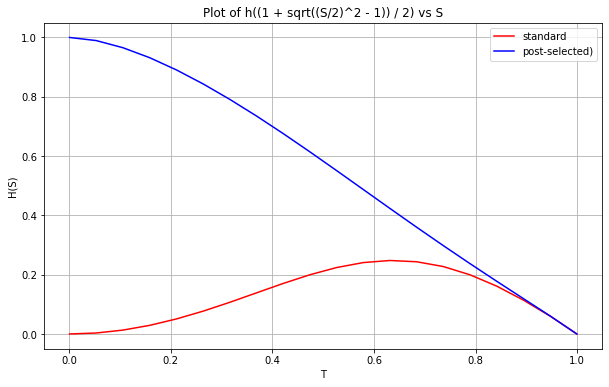

In [34]:
randomness_standard = [randomness(S) for S in optimized_scores]
randomness_post_select = [randomness(S) for S in optimized_scores_post_select]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_values, randomness_standard, label="standard", color='red')
plt.plot(T_values, randomness_post_select, label="post-selected)", color='blue')
plt.xlabel("T")
plt.ylabel("H(S)")
plt.title("Plot of h((1 + sqrt((S/2)^2 - 1)) / 2) vs S")
plt.grid(True)
plt.legend()
plt.show()

In [22]:
randomness_post_select

[0.999826297425698,
 0.9893258566609276,
 0.9652427627580736,
 0.9316173678080006,
 0.8905035196266912,
 0.843330456365972,
 0.7912118414268824,
 0.7350926242113531,
 0.6758293921788948,
 0.6142337725390885,
 0.5510979012165139,
 0.4872039132912469,
 0.42328560459756825,
 0.360008273756533,
 0.2978602969686215,
 0.2371050139661548,
 0.17769139031184844,
 0.11919858733111743,
 0.0608018824978489,
 0]

In [35]:
p_fail = []
T_values = np.linspace(0.001, 0.999, grid)
for T in T_values:
    mm = M_2x2_parametrized([0, 0, T ])
    p_fail.append(p(0,0,0,0,mm))

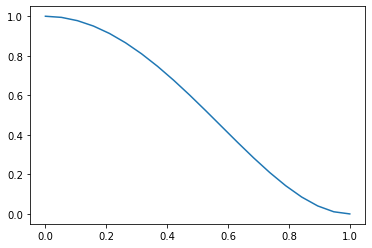

In [36]:
plt.plot(T_values, p_fail)

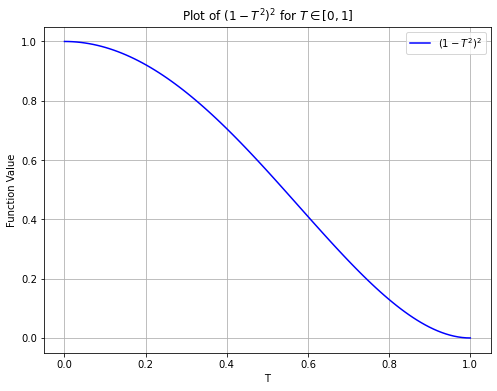

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def function(T):
    return (1 - T**2)**2

# Generate values for T in the range [0, 1]
T_values = np.linspace(0, 1, 100)

# Compute the function values
y_values = function(T_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(T_values, y_values, label=r"$(1 - T^2)^2$", color='blue')
plt.xlabel("T")
plt.ylabel("Function Value")
plt.title("Plot of $(1 - T^2)^2$ for $T \in [0, 1]$")
plt.grid(True)
plt.legend()
plt.show()


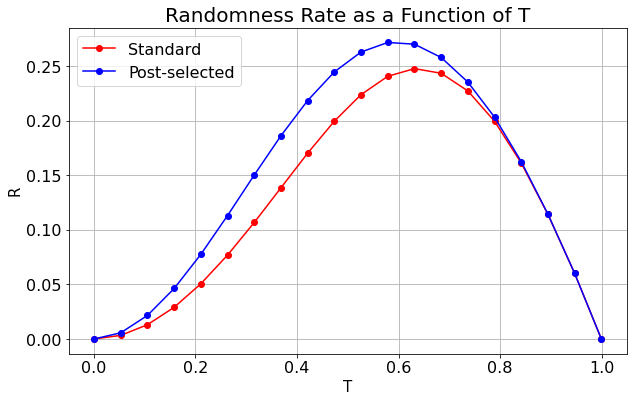

In [38]:
randomness_standard = [randomness(S) for S in optimized_scores]
randomness_post_select = []



T_values = np.linspace(0.001, 0.999, grid)

for i in range(20):
    T = T_values[i]
    mm = M_2x2_parametrized([0, 0, T ])
    S = optimized_scores_post_select[i]
    r = randomness(S)*(1-p(0,0,0,0,mm))
    randomness_post_select.append(r)

# Plotting the results

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(T_values, randomness_standard, marker='o', linestyle='-', label="Standard", color='red')
plt.plot(T_values, randomness_post_select, marker='o', linestyle='-', label="Post-selected", color='blue')
plt.xlabel("T", size = 15)
plt.ylabel("R", size = 15)
plt.title("Randomness Rate as a Function of T",  size = 20)
plt.grid(True)
plt.legend(loc='best' ,prop={'size': 16})  # Add legend with automatic placement
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [39]:
fig.savefig('Randomness_Bell.pdf', bbox_inches='tight')

/var/folders/hp/59m8q4js7lx0mprsqm5s803c0000gn/T/ipykernel_7526/2911060405.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  advantage = [randomness_post_select[i]/randomness_standard[i] for i in range(len(randomness_standard))]


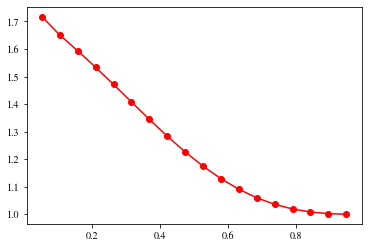

In [572]:
advantage = [randomness_post_select[i]/randomness_standard[i] for i in range(len(randomness_standard))]

plt.plot(T_values, advantage, marker='o', linestyle='-', label="Standard", color='red')


In [236]:
i= 0
T = T_values[i]
mm = M_2x2_parametrized([0, 0, T ])
S = optimized_scores_post_select[i]
r = randomness(S)*(1-p(0,0,0,0,mm))
r

/var/folders/hp/59m8q4js7lx0mprsqm5s803c0000gn/T/ipykernel_7526/3729732510.py:7: RuntimeWarning: invalid value encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


nan

In [238]:
p(0,0,0,0,mm)

0.999998

In [239]:
randomness(S)

/var/folders/hp/59m8q4js7lx0mprsqm5s803c0000gn/T/ipykernel_7526/3729732510.py:7: RuntimeWarning: invalid value encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


nan

In [240]:
S

2.840000000075986

In [241]:
2*np.sqrt(2)

2.8284271247461903

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

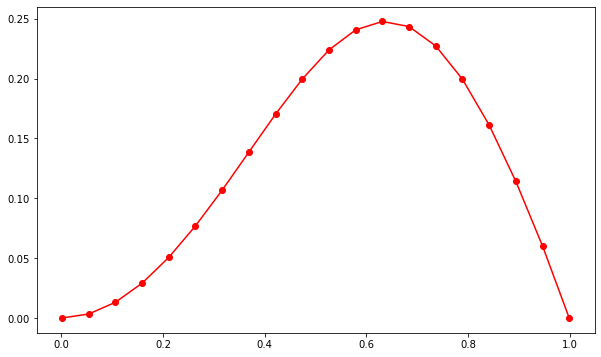

In [18]:

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(T_values, randomness_standard, marker='o', linestyle='-', label="Standard", color='red')
plt.plot(T_values, randomness_post_select, marker='o', linestyle='-', label="Post-selected", color='blue')

plt.plot(T_values, optimized_scores, marker='o', linestyle='-', color='r', label='Standard CHSH Score')
plt.plot(T_values, optimized_scores_post_select, marker='o', linestyle='-', color='b', label='Post-Selection CHSH Score')


plt.xlabel("T", size = 15)
plt.ylabel("R/S", size = 15)
plt.title("Randomness Rate/ CHSH Score as a Function of T",  size = 20)
plt.grid(True)
plt.legend(loc='best' ,prop={'size': 16})  # Add legend with automatic placement
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


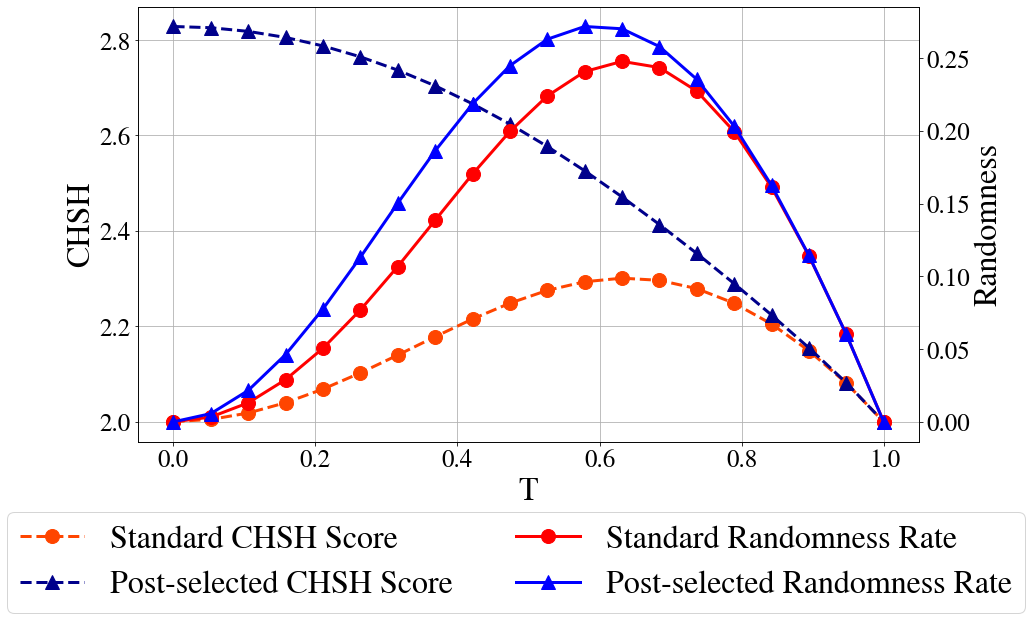

In [58]:
#plt.style.use('seaborn-dark-palette')

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

matplotlib.rcParams['axes.titlepad'] = 10  # pad is in points...







import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 8))
ax = plt.subplot(111)

# Plot S values on the primary y-axis

ax1.plot(T_values, optimized_scores,marker='o', markersize=14, linestyle='--', color='orangered', label='Standard CHSH Score',linewidth=3.0)
ax1.plot(T_values, optimized_scores_post_select,marker='^', markersize=14, linestyle='--', color='darkblue', label='Post-selected CHSH Score',linewidth=3.0)
ax1.set_xlabel("T", size=32)
ax1.set_ylabel("CHSH", size=32)
ax1.tick_params(axis='y')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
ax1.grid(True)

# Secondary y-axis for R values
ax2 = ax1.twinx()
ax2.plot(T_values, randomness_standard,marker='o', markersize=14, linestyle='-', label="Standard Randomness Rate", color='r',linewidth=3.0)
ax2.plot(T_values, randomness_post_select,marker='^', markersize=14, linestyle='-', label="Post-selected Randomness Rate", color='b',linewidth=3.0)

ax2.set_ylabel("Randomness", size=32)
ax2.tick_params(axis='y')

# Combined legend
#fig.legend(loc='upper right', prop={'size': 12})
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, prop={'size': 32})


# Title and formatting
#plt.title("Randomness Rate/CHSH Score as a Function of T", size=20)
#plt.xticks(fontsize=16)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()


In [59]:
fig.savefig('SPDC_plot_marker2.pdf', bbox_inches='tight')

# Maximize Randomness Rate with both T1 and T2

### standard

In [456]:
def CHSH_Score_general(params):
    
    [T1, T2, alpha0, alpha1, beta0, beta1] = params
    
    
    D = np.diag([T1, T2])
    
    Ra0 = np.array([
        [np.cos(alpha0), -np.sin(alpha0)],
        [np.sin(alpha0),  np.cos(alpha0)]])
    
    Ra1 = np.array([
        [np.cos(alpha1), -np.sin(alpha1)],
        [np.sin(alpha1),  np.cos(alpha1)]])
    
    
    Rb0 = np.array([
        [np.cos(beta0), -np.sin(beta0)],
        [np.sin(beta0),  np.cos(beta0)]])
    
    Rb1 = np.array([
        [np.cos(beta1), -np.sin(beta1)],
        [np.sin(beta1),  np.cos(beta1)]])
    
    
    # Mxy
    M00 = Ra0 @ D @ Rb0.T
    M01 = Ra0 @ D @ Rb1.T
    M10 = Ra1 @ D @ Rb0.T
    M11 = Ra1 @ D @ Rb1.T
    
    
    #....................................................
    
    # Initialize q(a, b)
    q00 = {
        (0, 0): 0.0,
        (0, 1): 0.0,
        (1, 0): 0.0,
        (1, 1): 0.0}
    
    q01 = q00.copy()
    q10 = q00.copy()
    q11 = q00.copy()
    
    
    # Collect all possible combinations
    all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                         for b1 in [0, 1] for b2 in [0, 1]]

    # Compute q(a, b)
    # here we assume the same relabaling for all x,y inputs
    for a1, a2, b1, b2 in all_combinations:
        prob00 = p(a1, a2, b1, b2, M00)
        prob01 = p(a1, a2, b1, b2, M01)
        prob10 = p(a1, a2, b1, b2, M10)
        prob11 = p(a1, a2, b1, b2, M11)

        # Get local mappings for Alice and Bob
        a = alice_mapping(a1, a2)
        b = bob_mapping(b1, b2)

        q00[(a, b)] += prob00
        q01[(a, b)] += prob01
        q10[(a, b)] += prob10
        q11[(a, b)] += prob11
        
    avg_00 = q00[(0, 0)]+q00[(1, 1)]-q00[(0, 1)]-q00[(1, 0)]
    avg_01 = q01[(0, 0)]+q01[(1, 1)]-q01[(0, 1)]-q01[(1, 0)]
    avg_10 = q10[(0, 0)]+q10[(1, 1)]-q10[(0, 1)]-q10[(1, 0)]
    avg_11 = q11[(0, 0)]+q11[(1, 1)]-q11[(0, 1)]-q11[(1, 0)]
    
    CHSH_score = avg_00 + avg_01 + avg_10 - avg_11
    
    return -CHSH_score

In [506]:
### [T1, T2, alpha0, alpha1, beta0, beta1] = params


from scipy.optimize import minimize


def objr(params):
    S = CHSH_Score_general(params)
    r = randomness(S)
    return -r+0.1*S
    



init_param = np.random.uniform(0, 1, 6)  # Random starting matrix  #########????
bounds = [(0, 1),(0, 1), (0, 2*np.pi), (0, 2*np.pi),(0, 2*np.pi), (0, 2*np.pi)]  # Element-wise bounds for m



# Optimize
result = minimize(
    objr,
    init_param,
    bounds=bounds,
    method='Powell',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_m = result.x
print("Optimized matrix m:\n", optimized_m)
print("Objective value:", -result.fun)

S_opt = CHSH_Score_general(optimized_m)
print("CHSH_Score:", -S_opt)
print("Randomness:", randomness(S_opt))

Optimization terminated successfully.
         Current function value: -0.481881
         Iterations: 6
         Function evaluations: 478
Optimized matrix m:
 [0.68785608 0.61708394 3.47641069 2.94451424 3.20901693 3.75466335]
Objective value: 0.48188074376280643
CHSH_Score: 2.30457949
Randomness: 0.2514227947628064


In [ ]:
[0.60984154 0.71480544 1.66836888 4.30636794 4.56379381 1.92144051]
Objective value: 0.483102278993771
CHSH_Score: 2.30574724
Randomness: 0.252527554993771

### post-selected

In [507]:
def CHSH_Score_general_postselect(params):
    
    [T1, T2, alpha0, alpha1, beta0, beta1] = params
    
    
    D = np.diag([T1, T2])
    
    Ra0 = np.array([
        [np.cos(alpha0), -np.sin(alpha0)],
        [np.sin(alpha0),  np.cos(alpha0)]])
    
    Ra1 = np.array([
        [np.cos(alpha1), -np.sin(alpha1)],
        [np.sin(alpha1),  np.cos(alpha1)]])
    
    
    Rb0 = np.array([
        [np.cos(beta0), -np.sin(beta0)],
        [np.sin(beta0),  np.cos(beta0)]])
    
    Rb1 = np.array([
        [np.cos(beta1), -np.sin(beta1)],
        [np.sin(beta1),  np.cos(beta1)]])
    
    
    # Mxy
    M00 = Ra0 @ D @ Rb0.T
    M01 = Ra0 @ D @ Rb1.T
    M10 = Ra1 @ D @ Rb0.T
    M11 = Ra1 @ D @ Rb1.T
    
    
    #....................................................
    
    # Initialize q(a, b)
    q00 = {
        (0, 0): 0.0,
        (0, 1): 0.0,
        (1, 0): 0.0,
        (1, 1): 0.0}
    
    q01 = q00.copy()
    q10 = q00.copy()
    q11 = q00.copy()
    
    # Local mappings for Alice and Bob
    def local_mapping_a(a1, a2):
        # valid terms
        if (a1, a2) == (0, 1):
            return 0
        elif (a1, a2) == (1, 0):
            return 1

        # not valid terms
        elif (a1, a2) == (0, 0):
            return 0
        elif (a1, a2) == (1, 1):
            return 0
        
        
    def local_mapping_b(a1, a2):
        # valid terms
        if (a1, a2) == (0, 1):
            return 0
        elif (a1, a2) == (1, 0):
            return 1

        # not valid terms
        elif (a1, a2) == (0, 0):
            return 0
        elif (a1, a2) == (1, 1):
            return 0
    
    
    # Collect all possible combinations
    all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                         for b1 in [0, 1] for b2 in [0, 1]]

    # Compute q(a, b)
    # here we assume the same relabaling for all x,y inputs
    for a1, a2, b1, b2 in all_combinations:
        prob00 = p_post_select(a1, a2, b1, b2, M00)
        prob01 = p_post_select(a1, a2, b1, b2, M01)
        prob10 = p_post_select(a1, a2, b1, b2, M10)
        prob11 = p_post_select(a1, a2, b1, b2, M11)

        # Get local mappings for Alice and Bob
        a = local_mapping_a(a1, a2)
        b = local_mapping_b(b1, b2)

        q00[(a, b)] += prob00
        q01[(a, b)] += prob01
        q10[(a, b)] += prob10
        q11[(a, b)] += prob11
        
    avg_00 = q00[(0, 0)]+q00[(1, 1)]-q00[(0, 1)]-q00[(1, 0)]
    avg_01 = q01[(0, 0)]+q01[(1, 1)]-q01[(0, 1)]-q01[(1, 0)]
    avg_10 = q10[(0, 0)]+q10[(1, 1)]-q10[(0, 1)]-q10[(1, 0)]
    avg_11 = q11[(0, 0)]+q11[(1, 1)]-q11[(0, 1)]-q11[(1, 0)]
    
    CHSH_score = avg_00 + avg_01 + avg_10 - avg_11
    
    return -CHSH_score

In [533]:
### [T1, T2, alpha0, alpha1, beta0, beta1] = params

from scipy.optimize import minimize


def objr(params):
    T1 = params[0]
    T2 = params[1]
    
    S = CHSH_Score_general_postselect(params)
    r = randomness(S)
    p_fail = (1 - T1**2)*(1 - T2**2)
    return -r*(1-p_fail)+0.009*S
    #S#-r+0.1*S

    


init_param = np.random.uniform(0, 1, 6)  # Random starting matrix  #########????
bounds = [(0, 1),(0, 1), (0, 2*np.pi), (0, 2*np.pi),(0, 2*np.pi), (0, 2*np.pi)]  # Element-wise bounds for m



# Optimize
result = minimize(
    objr,
    init_param,
    bounds=bounds,
    method='Powell',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_param = result.x
print("Optimized  param:\n", optimized_param)
print("Objective value:", -result.fun)


T1 = optimized_param[0]
T2 = optimized_param[1]
p_fail = (1 - T1**2)*(1 - T2**2)

S_opt = CHSH_Score_general_postselect(optimized_param)
print("CHSH_Score:", -S_opt)
print("Randomness:", randomness(S_opt)*(1-p_fail))

Optimization terminated successfully.
         Current function value: -0.296766
         Iterations: 8
         Function evaluations: 686
Optimized  param:
 [0.62350761 0.58240592 3.22578455 3.82370433 3.52145388 2.93136746]
Objective value: 0.2967656223772918
CHSH_Score: 2.5030923177911664
Randomness: 0.2742377915171713


In [468]:
Optimized  param:
 [0.63077438 0.57993051 3.26323611 2.67832769 2.97301941 3.55720105]
Objective value: 0.29993274854132373
CHSH_Score: 2.5012583068128658
Randomness: 0.2749201654731951

SyntaxError: invalid syntax (2382923287.py, line 1)

In [534]:
p_fail = (1 - 0.63077438**2)*(1 - 0.57993051**2)
p_fail 

0.3996178083860343

## Best result for $T1 = T2 = T$

### standard

In [428]:
#CHSH_Score_post_select(params)
#[T, alpha0, alpha1, beta1] = params


def obj_best(params):
    T = params[0]
    
    S = CHSH_Score(params)
    r = randomness(S)
    p_fail = (1 - T**2)**2
    return S#-r*(1-p_fail)+0.1*S
    #S#-r+0.1*S

    


init_param = np.random.uniform(0, 1, 4)  # Random starting matrix  #########????
bounds = [(0, 1), (0, 2*np.pi),(0, 2*np.pi), (0, 2*np.pi)]  # Element-wise bounds for m



# Optimize
result = minimize(
    obj_best,
    init_param,
    bounds=bounds,
    method='Powell',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_param = result.x
print("Optimized  param:\n", optimized_param)
print("Objective value:", -result.fun)


T = optimized_param[0]

p_fail = (1 - T**2)**2

S_opt = CHSH_Score(optimized_param)
print("CHSH_Score:", -S_opt)
print("Randomness:", randomness(S_opt))#*(1-p_fail))

Optimization terminated successfully.
         Current function value: -2.300829
         Iterations: 8
         Function evaluations: 509
Optimized  param:
 [0.63786806 3.43508835 2.84715837 3.72851633]
Objective value: 2.3008294800000004
CHSH_Score: 2.3008294800000004
Randomness: 0.2478835502936937


In [ ]:
## Standard setting
## Optimized  param:
## [T, alpha0, alpha1, beta1]
[0.63786806 3.43508835 2.84715837 3.72851633]

CHSH_Score: 2.3008294800000004
Randomness: 0.2478835502936937

### post selected

In [437]:
#CHSH_Score_post_select(params)
#[T, alpha0, alpha1, beta1] = params


def obj_best(params):
    T = params[0]
    
    S = CHSH_Score_post_select(params)
    r = randomness(S)
    p_fail = (1 - T**2)**2
    return -r*(1-p_fail)+0.1*S
    #S#-r+0.1*S

    


init_param = np.random.uniform(0, 1, 4)  # Random starting matrix  #########????
bounds = [(0, 1), (0, 2*np.pi),(0, 2*np.pi), (0, 2*np.pi)]  # Element-wise bounds for m



# Optimize
result = minimize(
    obj_best,
    init_param,
    bounds=bounds,
    method='Powell',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_param = result.x
print("Optimized  param:\n", optimized_param)
print("Objective value:", -result.fun)


T = optimized_param[0]

p_fail = (1 - T**2)**2

S_opt = CHSH_Score_post_select(optimized_param)
print("CHSH_Score:", -S_opt)
print("p_fail:", p_fail)
print("Randomness:", randomness(S_opt)*(1-p_fail))

Optimization terminated successfully.
         Current function value: -0.524453
         Iterations: 8
         Function evaluations: 496
Optimized  param:
 [0.57205018 2.82395783 3.4587335  2.50741325]
Objective value: 0.5244529284168863
CHSH_Score: 2.532637906091619
p_fail: 0.4526041280133279
Randomness: 0.2711891378077244


In [439]:
np.pi/4

0.7853981633974483

In [ ]:

## Post_select setting
##Optimized  param:
## [T, alpha0, alpha1, beta1]
[0.57205018 2.82395783 3.4587335  2.50741325]


CHSH_Score: 2.532637906091619
p_fail: 0.4526041280133279
Randomness: 0.2711891378077244

## The settings a = 0°, a′ = 45°, b = 22.5°, and b′ = 67.5° are generally in practice chosen ??

In [451]:
## [T, alpha0, alpha1, beta1]

param_experiment = [0.6, np.pi/8, 3*np.pi/8, np.pi/4]

T = param_experiment[0]

p_fail = (1 - T**2)**2

S_opt = CHSH_Score_post_select(param_experiment)
print("CHSH_Score:", -S_opt)
print("p_fail:", p_fail)
print("Randomness:", randomness(S_opt)*(1-p_fail))

CHSH_Score: 0.2634681571815718
p_fail: 0.4096
Randomness: 0.0


# Use Unitaries

In [573]:
def unitary_U(alpha, beta, gamma, delta):
    
    # Define each component based on the formula
    U11 = np.exp(1j * (alpha - beta / 2 - delta / 2)) * np.cos(gamma / 2)
    U12 = -np.exp(1j * (alpha - beta / 2 + delta / 2)) * np.sin(gamma / 2)
    U21 = np.exp(1j * (alpha + beta / 2 - delta / 2)) * np.sin(gamma / 2)
    U22 = np.exp(1j * (alpha + beta / 2 + delta / 2)) * np.cos(gamma / 2)
    
    # Combine into a 2x2 matrix
    U = np.array([[U11, U12], [U21, U22]])
    return U

## Standard

In [578]:
def CHSH_Score_Unitary(params):

    # num params : 2 + 4x4 = 18
    [T1, T2, alpha_a0, beta_a0, gamma_a0, delta_a0, alpha_a1, beta_a1, gamma_a1, delta_a1, alpha_b0, beta_b0, gamma_b0, delta_b0, alpha_b1, beta_b1, gamma_b1, delta_b1] = params
    
    
    D = np.diag([T1, T2])
    
    U_a0 = unitary_U(alpha_a0, beta_a0, gamma_a0, delta_a0)
    U_a1 = unitary_U(alpha_a1, beta_a1, gamma_a1, delta_a1)
    
    U_b0 = unitary_U(alpha_b0, beta_b0, gamma_b0, delta_b0)
    U_b1 = unitary_U(alpha_b1, beta_b1, gamma_b1, delta_b1)
    
    
    # Mxy
    M00 = U_a0 @ D @ U_b0.T
    M01 = U_a0 @ D @ U_b1.T
    M10 = U_a1 @ D @ U_b0.T
    M11 = U_a1 @ D @ U_b1.T
    
    
    #....................................................
    
    # Initialize q(a, b)
    q00 = {
        (0, 0): 0.0,
        (0, 1): 0.0,
        (1, 0): 0.0,
        (1, 1): 0.0}
    
    q01 = q00.copy()
    q10 = q00.copy()
    q11 = q00.copy()
    
    
    # Collect all possible combinations
    all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                         for b1 in [0, 1] for b2 in [0, 1]]

    # Compute q(a, b)
    # here we assume the same relabaling for all x,y inputs
    for a1, a2, b1, b2 in all_combinations:
        prob00 = p(a1, a2, b1, b2, M00)
        prob01 = p(a1, a2, b1, b2, M01)
        prob10 = p(a1, a2, b1, b2, M10)
        prob11 = p(a1, a2, b1, b2, M11)

        # Get local mappings for Alice and Bob
        a = alice_mapping(a1, a2)
        b = bob_mapping(b1, b2)

        q00[(a, b)] += prob00
        q01[(a, b)] += prob01
        q10[(a, b)] += prob10
        q11[(a, b)] += prob11
        
    avg_00 = q00[(0, 0)]+q00[(1, 1)]-q00[(0, 1)]-q00[(1, 0)]
    avg_01 = q01[(0, 0)]+q01[(1, 1)]-q01[(0, 1)]-q01[(1, 0)]
    avg_10 = q10[(0, 0)]+q10[(1, 1)]-q10[(0, 1)]-q10[(1, 0)]
    avg_11 = q11[(0, 0)]+q11[(1, 1)]-q11[(0, 1)]-q11[(1, 0)]
    
    CHSH_score = avg_00 + avg_01 + avg_10 - avg_11
    
    return -CHSH_score

In [582]:
### [T1, T2, alpha0, alpha1, beta0, beta1] = params


from scipy.optimize import minimize


def objr(params):
    S = CHSH_Score_Unitary(params)
    r = randomness(S)
    return -r+0.1*S
    


init_param = np.random.uniform(0, 1, 18)  # Random starting matrix  #########????
bounds = [(0, 1), (0, 1)] + [(0, 4 * np.pi)] * 16



# Optimize
result = minimize(
    objr,
    init_param,
    bounds=bounds,
    method='Powell',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_param = result.x
print("Optimized matrix m:\n", optimized_param)
print("Objective value:", -result.fun)

S_opt = CHSH_Score_Unitary(optimized_param)
print("CHSH_Score:", -S_opt)
print("Randomness:", randomness(S_opt))

Optimization terminated successfully.
         Current function value: -0.481053
         Iterations: 6
         Function evaluations: 2079
Optimized matrix m:
 [ 0.67826886  0.61956107 12.56632904 12.56632904  6.56069586  5.92045566
 12.56632904 12.56632904  7.6752304   5.90795547 12.56632904 12.56632904
  7.1073005   6.65557007 12.56632904 12.56632904  6.01761504  6.67220849]
Objective value: 0.48105270898485375
CHSH_Score: 2.30378723
Randomness: 0.2506739859848537


## Post selected

In [585]:
def CHSH_Score_Unitary_postselect(params):
    
    # num params : 2 + 4x4 = 18
    [T1, T2, alpha_a0, beta_a0, gamma_a0, delta_a0, alpha_a1, beta_a1, gamma_a1, delta_a1, alpha_b0, beta_b0, gamma_b0, delta_b0, alpha_b1, beta_b1, gamma_b1, delta_b1] = params
    
    
    D = np.diag([T1, T2])
    
    U_a0 = unitary_U(alpha_a0, beta_a0, gamma_a0, delta_a0)
    U_a1 = unitary_U(alpha_a1, beta_a1, gamma_a1, delta_a1)
    
    U_b0 = unitary_U(alpha_b0, beta_b0, gamma_b0, delta_b0)
    U_b1 = unitary_U(alpha_b1, beta_b1, gamma_b1, delta_b1)
    
    
    # Mxy
    M00 = U_a0 @ D @ U_b0.T
    M01 = U_a0 @ D @ U_b1.T
    M10 = U_a1 @ D @ U_b0.T
    M11 = U_a1 @ D @ U_b1.T
    
    
    #....................................................
    
    # Initialize q(a, b)
    q00 = {
        (0, 0): 0.0,
        (0, 1): 0.0,
        (1, 0): 0.0,
        (1, 1): 0.0}
    
    q01 = q00.copy()
    q10 = q00.copy()
    q11 = q00.copy()
    
    # Local mappings for Alice and Bob
    def local_mapping_a(a1, a2):
        # valid terms
        if (a1, a2) == (0, 1):
            return 0
        elif (a1, a2) == (1, 0):
            return 1

        # not valid terms
        elif (a1, a2) == (0, 0):
            return 0
        elif (a1, a2) == (1, 1):
            return 0
        
        
    def local_mapping_b(a1, a2):
        # valid terms
        if (a1, a2) == (0, 1):
            return 0
        elif (a1, a2) == (1, 0):
            return 1

        # not valid terms
        elif (a1, a2) == (0, 0):
            return 0
        elif (a1, a2) == (1, 1):
            return 0
    
    
    # Collect all possible combinations
    all_combinations = [(a1, a2, b1, b2) for a1 in [0, 1] for a2 in [0, 1]
                                         for b1 in [0, 1] for b2 in [0, 1]]

    # Compute q(a, b)
    # here we assume the same relabaling for all x,y inputs
    for a1, a2, b1, b2 in all_combinations:
        prob00 = p_post_select(a1, a2, b1, b2, M00)
        prob01 = p_post_select(a1, a2, b1, b2, M01)
        prob10 = p_post_select(a1, a2, b1, b2, M10)
        prob11 = p_post_select(a1, a2, b1, b2, M11)

        # Get local mappings for Alice and Bob
        a = local_mapping_a(a1, a2)
        b = local_mapping_b(b1, b2)

        q00[(a, b)] += prob00
        q01[(a, b)] += prob01
        q10[(a, b)] += prob10
        q11[(a, b)] += prob11
        
    avg_00 = q00[(0, 0)]+q00[(1, 1)]-q00[(0, 1)]-q00[(1, 0)]
    avg_01 = q01[(0, 0)]+q01[(1, 1)]-q01[(0, 1)]-q01[(1, 0)]
    avg_10 = q10[(0, 0)]+q10[(1, 1)]-q10[(0, 1)]-q10[(1, 0)]
    avg_11 = q11[(0, 0)]+q11[(1, 1)]-q11[(0, 1)]-q11[(1, 0)]
    
    CHSH_score = avg_00 + avg_01 + avg_10 - avg_11
    
    return -CHSH_score

In [591]:
### [T1, T2, alpha0, alpha1, beta0, beta1] = params

from scipy.optimize import minimize


def objr(params):
    T1 = params[0]
    T2 = params[1]
    
    S = CHSH_Score_Unitary_postselect(params)
    r = randomness(S)
    p_fail = (1 - T1**2)*(1 - T2**2)
    return -r*(1-p_fail)+0.009*S
    #S#-r+0.1*S



init_param = np.random.uniform(0, 1, 18)  # Random starting matrix  #########????
bounds = [(0, 1), (0, 1)] + [(0, 4 * np.pi)] * 16



# Optimize
result = minimize(
    objr,
    init_param,
    bounds=bounds,
    method='Powell',# Nelder-Mead , Powell
    options={'disp': True}
)

# Results
optimized_param = result.x
print("Optimized  param:\n", optimized_param)
print("Objective value:", -result.fun)


T1 = optimized_param[0]
T2 = optimized_param[1]
p_fail = (1 - T1**2)*(1 - T2**2)

S_opt = CHSH_Score_Unitary_postselect(optimized_param)
print("CHSH_Score:", -S_opt)
print("Randomness:", randomness(S_opt)*(1-p_fail))

Optimization terminated successfully.
         Current function value: -0.254661
         Iterations: 43
         Function evaluations: 16000
Optimized  param:
 [ 0.63287996  0.92721096 12.56632904 12.56632904  3.25254969  9.16070201
 12.56632904 12.56632904  9.0871627   2.95432839 12.56632904 12.56632904
  9.32543335  3.28224172 12.56632904 12.56632904  9.07391592  6.50194004]
Objective value: 0.2546613484182055
CHSH_Score: 2.3087312546421863
Randomness: 0.2338827671264258
